In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [199]:
ds=pd.read_csv('weather_data.csv')
ds

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,26.0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,1
1,2006-04-01 01:00:00.000 +0200,1,26.0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,1
2,2006-04-01 02:00:00.000 +0200,2,26.0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,1
3,2006-04-01 03:00:00.000 +0200,1,26.0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,1
4,2006-04-01 04:00:00.000 +0200,2,26.0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96376,2016-09-09 19:00:00.000 +0200,1,26.0,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,1
96377,2016-09-09 20:00:00.000 +0200,1,26.0,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,1
96378,2016-09-09 21:00:00.000 +0200,1,26.0,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,1
96379,2016-09-09 22:00:00.000 +0200,1,26.0,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,1


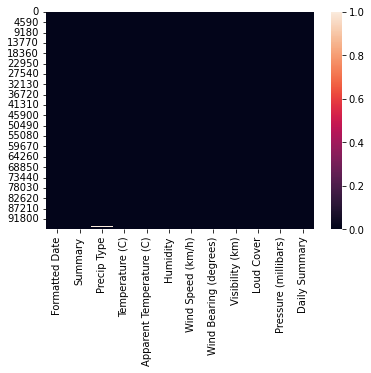

In [200]:
sns.heatmap(ds.isnull())
ds1=ds.dropna()

<AxesSubplot:>

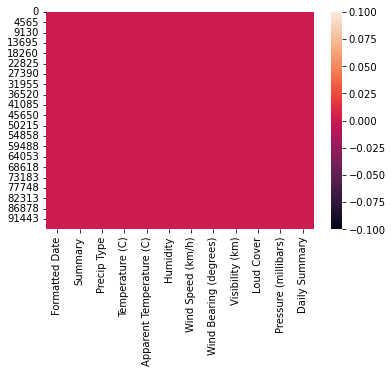

In [201]:
sns.heatmap(ds1.isnull())

In [202]:
#predict
#x=ds1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',]].values #iloc[:,:-1].values
#y=ds1[['RainToday','RainTomorrow']].values

#weather_data.csv
x=ds1[['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']].values
y=ds1['Daily Summary'].values


#seattle-weather.csv
#x=ds1[['precipitation','temp_max','temp_min','wind']].values 
#y=ds1['weather'].values

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [204]:
print("no of rows,column",x.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

no of rows,column (95864, 10)
x_train (67104, 10)
x_test (28760, 10)
y_train (67104,)
y_test (28760,)


In [205]:
x_train

array([[3.00000000e+00, 2.60000000e+01, 1.28888889e+00, ...,
        1.04006000e+01, 0.00000000e+00, 1.01579000e+03],
       [1.00000000e+00, 2.60000000e+01, 2.28500000e+01, ...,
        1.58263000e+01, 0.00000000e+00, 1.01511000e+03],
       [2.00000000e+00, 2.60000000e+01, 1.18611111e+01, ...,
        1.55526000e+01, 0.00000000e+00, 1.02226000e+03],
       ...,
       [1.00000000e+00, 2.60000000e+01, 3.11555556e+01, ...,
        1.55526000e+01, 0.00000000e+00, 1.01414000e+03],
       [3.00000000e+00, 2.60000000e+01, 1.07055556e+01, ...,
        1.40553000e+01, 0.00000000e+00, 1.01576000e+03],
       [7.00000000e+00, 2.60000000e+01, 1.71944444e+01, ...,
        9.98200000e+00, 0.00000000e+00, 1.01572000e+03]])

In [206]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [210]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=95)

In [211]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=95)

In [212]:
model.score(x_test,y_test)*100

90.76495132127955

In [213]:
y_predict=model.predict(x_test)

In [214]:
y_test=y_test.reshape(-1,1)
y_pred=y_predict.reshape(-1,1)

In [215]:

df=np.concatenate((y_test,y_pred),axis=1)
dataframe=pd.DataFrame(df,columns=['current weather','prediction of weather'])

In [216]:
dataframe

,current weather,prediction of weather
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
28755,1,1
28756,1,1
28757,1,1
28758,1,1


In [217]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'true')

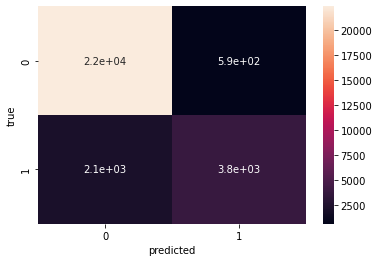

In [218]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [219]:
#from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#clf = SVC(kernel='linear')

In [220]:
#model.fit(x_train,y_train)

In [221]:
from sklearn.model_selection import KFold

In [222]:
kf = KFold(n_splits=10)
kf.get_n_splits(x)

10

In [223]:
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [224]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 9587  9588  9589 ... 95861 95862 95863] TEST: [   0    1    2 ... 9584 9585 9586]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [ 9587  9588  9589 ... 19171 19172 19173]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [19174 19175 19176 ... 28758 28759 28760]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [28761 28762 28763 ... 38345 38346 38347]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [38348 38349 38350 ... 47931 47932 47933]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [47934 47935 47936 ... 57517 57518 57519]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [57520 57521 57522 ... 67103 67104 67105]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [67106 67107 67108 ... 76689 76690 76691]
TRAIN: [    0     1     2 ... 95861 95862 95863] TEST: [76692 76693 76694 ... 86275 86276 86277]
TRAIN: [    0     1     2 ... 86275 86276 86277] TEST: [86278 86279 86280 ... 95861 95862 95863]


In [225]:
score=cross_val_score(model,x,y,cv=kf)

In [226]:
print("Cross Validation scores are{}".format(score))

Cross Validation scores are[0.86147909 0.88077605 0.88901638 0.86127047 0.83653244 0.86647194
 0.88597955 0.88817025 0.88264135 0.90308784]


In [197]:
Avg=score.mean()
Avg

0.6856381784908457

In [99]:
ds1.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,27-12-2015,8.6,4.4,1.7,2.9,2
1457,28-12-2015,1.5,5.0,1.7,1.3,2
1458,29-12-2015,0.0,7.2,0.6,2.6,5
1459,30-12-2015,0.0,5.6,-1.0,3.4,3
1460,31-12-2015,0.0,5.6,-2.1,3.5,3


In [100]:
tp1=ds1.iloc[0:1460]
tp1

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,1
1,2/1/2012,10.9,10.6,2.8,4.5,2
2,3/1/2012,0.8,11.7,7.2,2.3,2
3,4/1/2012,20.3,12.2,5.6,4.7,2
4,5/1/2012,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1455,26-12-2015,0.0,4.4,0.0,2.5,3
1456,27-12-2015,8.6,4.4,1.7,2.9,2
1457,28-12-2015,1.5,5.0,1.7,1.3,2
1458,29-12-2015,0.0,7.2,0.6,2.6,5


In [101]:
x2=tp1[['precipitation','temp_max','temp_min','wind']].values 
y2=tp1[['weather']].values

In [102]:
x2

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 1.5,  5. ,  1.7,  1.3],
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4]])

In [103]:
y2

array([[1],
       [2],
       [2],
       ...,
       [2],
       [5],
       [3]], dtype=int64)

In [104]:
tp=ds1.tail(1)#iloc[1460:1461]
tp


,date,precipitation,temp_max,temp_min,wind,weather
1460,31-12-2015,0.0,5.6,-2.1,3.5,3


In [105]:
x1=tp[['precipitation','temp_max','temp_min','wind']].values 
y1=tp[['weather']].values

In [106]:
x1

array([[ 0. ,  5.6, -2.1,  3.5]])

In [107]:
y1

array([[3]], dtype=int64)

In [108]:
print("x_train",x2.shape)
print("x_test",x1.shape)
print("y_train",y2.shape)
print("y_test",y1.shape)

x_train (1460, 4)
x_test (1, 4)
y_train (1460, 1)
y_test (1, 1)


In [109]:
model.fit(x2,y2)

C:\Users\RUPAK\AppData\Local\Temp/ipykernel_584/1184512589.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x2,y2)


RandomForestClassifier(n_estimators=95)

In [110]:
model.score(x1,y1)*100

100.0

In [111]:
y_predict1=model.predict(x1)

In [112]:
y1=y1.reshape(-1,1)
y1_pred=y_predict1.reshape(-1,1)

In [113]:
y_predict1

array([3], dtype=int64)

In [114]:
#y1_pred=y_predict1.reshape(-1,1)
tp=np.concatenate((y1,y1_pred),axis=1)
dataframe1=pd.DataFrame(tp,columns=['current weather','prediction of weather'])


In [115]:
print("the current weather is :")
if y1_pred==1:
    print("drizzle")
elif y1_pred==2:
    print("rainy")
elif y1_pred==3:
    print("sunny")
elif y1_pred==4:
    print("snowy")
elif y1_pred==5:
    print("foggy")    


the current weather is :
sunny
